In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

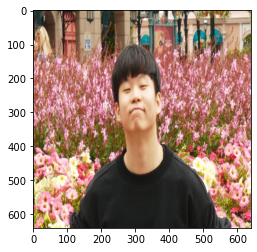

In [2]:
import os
my_image_path = os.getenv('HOME')+'/aiffel/camera_sticker/images/image.JPG'
img_bgr = cv2.imread(my_image_path)    #- OpenCV로 이미지를 읽어서
img_bgr = cv2.resize(img_bgr, (640, 640))    # 640x360의 크기로 Resize
# plt.imshow 이전에 RGB 이미지로 바꾸는 것을 잊지마세요. 
img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)
img_show = img_bgr.copy()
plt.imshow(img_rgb)
plt.show()


In [3]:
import dlib
detector_hog = dlib.get_frontal_face_detector()   #- detector 선언

In [4]:
#detector를 이용해서 얼굴의 bounding box를 추출합니다.
img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)
dlib_rects = detector_hog(img_rgb, 1)   #- (image, num of img pyramid)

rectangles[[(239, 196) (368, 325)]]


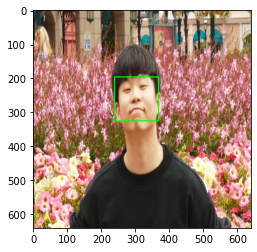

In [5]:
# 영역을 출력
print(dlib_rects)   # 찾은 얼굴영역 좌표

for dlib_rect in dlib_rects:
    l = dlib_rect.left()
    t = dlib_rect.top()
    r = dlib_rect.right()
    b = dlib_rect.bottom()

    cv2.rectangle(img_show, (l,t), (r,b), (0,255,0), 2, lineType=cv2.LINE_AA)
    
img_show_rgb =  cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB)
plt.imshow(img_show_rgb)
plt.show()

In [6]:
# 저장한 landmark 모델을 불러옵니다
import os
model_path = os.getenv('HOME')+'/aiffel/camera_sticker/models/shape_predictor_68_face_landmarks.dat'
landmark_predictor = dlib.shape_predictor(model_path)

landmark_predictor 는 RGB 이미지와 dlib.rectangle을 입력 받아 dlib.full_object_detection 를 반환합니다.

In [7]:
list_landmarks = []
for dlib_rect in dlib_rects:
    points = landmark_predictor(img_rgb, dlib_rect)
    list_points = list(map(lambda p: (p.x, p.y), points.parts()))
    list_landmarks.append(list_points)

print(len(list_landmarks[0]))
print(list_landmarks)

68
[[(251, 263), (251, 278), (252, 293), (254, 308), (258, 324), (265, 336), (276, 346), (290, 351), (308, 351), (326, 349), (340, 341), (351, 330), (359, 315), (362, 298), (362, 280), (361, 263), (359, 247), (260, 230), (263, 218), (271, 210), (282, 207), (292, 210), (304, 207), (313, 202), (324, 202), (332, 206), (337, 215), (299, 226), (300, 234), (301, 243), (302, 252), (293, 271), (298, 272), (303, 272), (309, 270), (314, 267), (269, 240), (274, 233), (281, 231), (287, 236), (281, 239), (274, 241), (313, 231), (318, 224), (325, 223), (330, 229), (326, 231), (319, 232), (284, 303), (290, 291), (298, 285), (304, 286), (309, 284), (317, 288), (327, 296), (318, 299), (311, 301), (305, 302), (299, 303), (291, 303), (288, 301), (299, 292), (304, 291), (309, 291), (323, 295), (310, 294), (304, 295), (299, 296)]]


points 는 dlib.full_object_detection 의 객체이기 때문에 parts() 함수로 개별 위치에 접근할 수 있습니다. 조금 더 직관적인 (x, y) 형태로 접근할 수 있도록 변환해 주었습니다. 따라서 list_points 는 tuple (x, y) 68개로 이루어진 리스트가 됩니다. 이미지에서 찾아진 얼굴 개수마다 반복하면 list_landmark에 68개의 랜드마크가 얼굴 개수만큼 저장됩니다.

랜드마크를 영상에 출력해 보겠습니다.

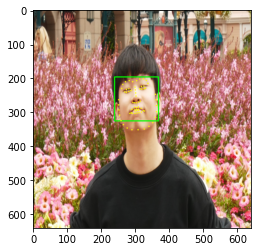

In [8]:
for landmark in list_landmarks:
    for idx, point in enumerate(list_points):
        cv2.circle(img_show, point, 2, (0, 255, 255), -1) # yellow

img_show_rgb = cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB)
plt.imshow(img_show_rgb)
plt.show()

# 스티커 씌우기

In [9]:
print(list(zip(dlib_rects, list_landmarks)))
for dlib_rect, landmark in zip(dlib_rects, list_landmarks):
    print (landmark[30]) # nose center index : 30
    x = landmark[30][0]
    y = landmark[30][1] - dlib_rect.width()//2
    w = dlib_rect.width()
    h = dlib_rect.width()
    print ('(x,y) : (%d,%d)'%(x,y))
    print ('(w,h) : (%d,%d)'%(w,h))

[(rectangle(239,196,368,325), [(251, 263), (251, 278), (252, 293), (254, 308), (258, 324), (265, 336), (276, 346), (290, 351), (308, 351), (326, 349), (340, 341), (351, 330), (359, 315), (362, 298), (362, 280), (361, 263), (359, 247), (260, 230), (263, 218), (271, 210), (282, 207), (292, 210), (304, 207), (313, 202), (324, 202), (332, 206), (337, 215), (299, 226), (300, 234), (301, 243), (302, 252), (293, 271), (298, 272), (303, 272), (309, 270), (314, 267), (269, 240), (274, 233), (281, 231), (287, 236), (281, 239), (274, 241), (313, 231), (318, 224), (325, 223), (330, 229), (326, 231), (319, 232), (284, 303), (290, 291), (298, 285), (304, 286), (309, 284), (317, 288), (327, 296), (318, 299), (311, 301), (305, 302), (299, 303), (291, 303), (288, 301), (299, 292), (304, 291), (309, 291), (323, 295), (310, 294), (304, 295), (299, 296)])]
(302, 252)
(x,y) : (302,187)
(w,h) : (130,130)


In [10]:
import os
sticker_path = os.getenv('HOME')+'/aiffel/camera_sticker/images/king.png'
img_sticker = cv2.imread(sticker_path)
img_sticker = cv2.resize(img_sticker, (w,h))
print (img_sticker.shape)

(130, 130, 3)


In [11]:
refined_x = x - w // 2  # left
refined_y = int(y - 1.3*h)       # top
print ('(x,y) : (%d,%d)'%(refined_x, refined_y))

(x,y) : (237,18)


In [ ]:
# # 음수 처리
# img_sticker = img_sticker[-refined_y:]
# print (img_sticker.shape)
# # refined_y = 0
# print ('(x,y) : (%d,%d)'%(refined_x, refined_y))

In [12]:
sticker_area = img_show[refined_y:refined_y+img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]]
sticker_area.shape
img_show[refined_y:refined_y+img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]] = \
    np.where(img_sticker==0,sticker_area,img_sticker).astype(np.uint8)

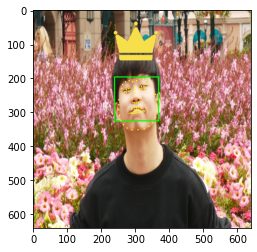

In [13]:
plt.imshow(cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB))
plt.show()

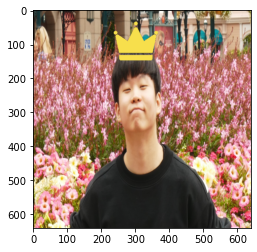

In [14]:
sticker_area = img_bgr[refined_y:refined_y+img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]]
img_bgr[refined_y:refined_y+img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]] = \
    np.where(img_sticker==0,sticker_area,img_sticker).astype(np.uint8)
plt.imshow(cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB))
plt.show()